In [15]:
import numpy as np
import matplotlib.pyplot as plt


In [34]:
# Long Call Butterfly Strategy:
# Buy ITM Call; Buy OTM Call; Write 2 ATM Call
s0 = 50           #Initial stock price
k1 = 40;c1 = 2.00 #ITM call strike/premium(C1) LONG
k2 = 50;c2 = 1.00 #ATM call strike/premium(C2,C3) SHORT
k3 = 60;c3 = 0.50 #OTM call strike/premium(C4) LONG
shares = 100      #100 shares/lot

In [35]:
#Stock price at expiration
sT = np.arange(0, 2*s0 ,2)

[-50. -50. -50. -50. -50. -50. -50. -50. -50. -50. -50. -50. -50. -50.
 -50. -50. -50. -50. -50. -50. -50. 150. 350. 550. 750. 950. 750. 550.
 350. 150. -50. -50. -50. -50. -50. -50. -50. -50. -50. -50. -50. -50.
 -50. -50. -50. -50. -50. -50. -50. -50.]
[-200. -200. -200. -200. -200. -200. -200. -200. -200. -200. -200. -200.
 -200. -200. -200. -200. -200. -200. -200. -200. -200.    0.  200.  400.
  600.  800. 1000. 1200. 1400. 1600. 1800. 2000. 2200. 2400. 2600. 2800.
 3000. 3200. 3400. 3600. 3800. 4000. 4200. 4400. 4600. 4800. 5000. 5200.
 5400. 5600.]
[  200.   200.   200.   200.   200.   200.   200.   200.   200.   200.
   200.   200.   200.   200.   200.   200.   200.   200.   200.   200.
   200.   200.   200.   200.   200.   200.  -200.  -600. -1000. -1400.
 -1800. -2200. -2600. -3000. -3400. -3800. -4200. -4600. -5000. -5400.
 -5800. -6200. -6600. -7000. -7400. -7800. -8200. -8600. -9000. -9400.]
[ -50.  -50.  -50.  -50.  -50.  -50.  -50.  -50.  -50.  -50.  -50.  -50.
  -50.  -5

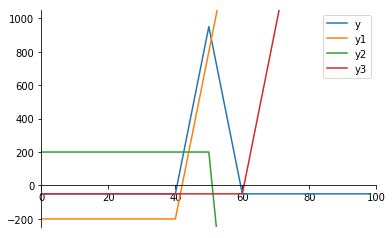

In [40]:
#Payoff from Lower strike (k1) ITM Long Call
y1 = np.where(sT > k1,((sT-k1) - c1) * shares, -c1 * shares)
#Payoff from ATM Call option (Short)
y2 = np.where(sT > k2,((k2-sT) + c2) * shares * 2, c2 * shares * 2)
#Payoff from Higher strike (k2) ITM Long Call
y3 = np.where(sT > k3,((sT-k3) - c3) * shares, -c3 * shares)

#Payoff for Butterfly
y = y1 + y2 + y3

#Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed 
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center
ax.tick_params(top=False, right=False) # Removes the tick-marks on the RHS

plt.plot(sT,y,lw = 1.5, label = "y")
plt.plot(sT,y1,lw= 1.5, label = "y1")
plt.plot(sT,y2,lw= 1.5, label = "y2")
plt.plot(sT,y3,lw= 1.5, label = "y3")
plt.axis([0, 2*s0, ((-c1+-c3)*shares), 1050])
plt.legend();

print(y)
print(y1)
print(y2)
print(y3)